In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dfx = pd.read_csv('./Train_Data/Linear_X_Train.csv')
dfy = pd.read_csv('./Train_Data/Linear_Y_Train.csv')
dftx = pd.read_csv('./Test_Data/Linear_X_Test.csv')

train_x = dfx.values.reshape((-1,))
train_y = dfy.values.reshape((-1,))
test_x = dftx.values.reshape((-1,))

#Normalization
X = (train_x-train_x.mean())/train_x.std()
Y =  (train_y)
X1 = (test_x-test_x.mean())/test_x.std()


[4.09139276]


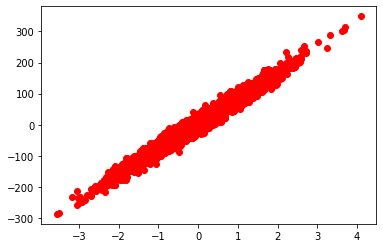

In [18]:
plt.scatter(X,Y,color='red')
plt.show()

 GRADIENT DESCENT ALGORITHM

In [6]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x

def error(X,Y,theta):
    
    m = X.shape[0]
    err = 0
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        err += ((hx-Y[i])**2)
    
    return err/(2*m)      

def gradient(X,Y,theta):
    
    grad = np.zeros((2,))
    m = X.shape[0]
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        grad[0] += ((hx-Y[i])/m)
        grad[1] += (((hx-Y[i])*X[i])/m)
    
    return grad

def gradientDescent(X,Y,learning_rate = 0.001):
    #random theta
    theta = np.array([0.5,75.0])
    itr = 0
    #lets start with 150
    max_itr = 1000
    
    error_list = []
    theta_list = []
    
    while(itr<=max_itr):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        itr += 1
        
    return theta,error_list, theta_list
       

In [7]:
final_theta, error_list, theta_list = gradientDescent(X,Y)

In [8]:
print(final_theta)

[ 0.6163288  78.10372373]


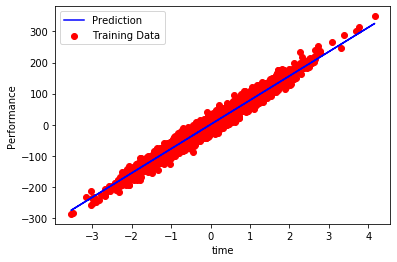

In [9]:
plt.scatter(X,Y,label = 'Training Data',color='red')
plt.xlabel('time')
plt.ylabel('Performance')
plt.plot(X,hypothesis(X,final_theta),color = 'blue',label = 'Prediction')

plt.legend()
plt.show()

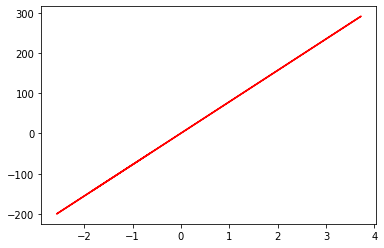

In [20]:
#testting
plt.plot(X1,hypothesis(X1,final_theta),color = 'red')